<a href="https://colab.research.google.com/github/JiaLong0209/coding365/blob/master/AI_python/final4_93_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
def showImage(x,y, title=''):
    plt.figure(figsize=(10,10))
    for i in range(25 if len(x) >= 25 else len(x)):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i])
        plt.xlabel(class_names[y[i][0]])
        plt.title(title)
    plt.show()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# showImage(train_images, train_labels)

In [ ]:

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=25,
    zoom_range=0.25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
)

# train_images, train_labels = train_images[:1] , train_labels[:1]

# showImage(train_images, train_labels)

new_images = np.repeat(train_images, 2, axis=0)
new_labels = np.repeat(train_labels, 2, axis=0)
batch_size =  len(new_images)

print(train_images.shape)
print(new_images.shape)


datagen.fit(new_images)

# img_iter = datagen.flow(new_images, new_labels, batch_size=batch_size)
# x, y = img_iter.next()
# print(x.shape, y.shape)

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 8)


(50000, 32, 32, 3)
(100000, 32, 32, 3)


In [ ]:
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
model = models.Sequential()
kernel_size = [64,128,256,512]

model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())

for i,kernel in enumerate(kernel_size):
    model.add(layers.Conv2D(kernel, (3, 3), activation='relu',padding='same'))
    model.add(layers.Conv2D(kernel, (3, 3), activation='relu',padding='same'))
    if(i > len(kernel_size)/2): model.add(layers.Conv2D(kernel, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())

model.add(layers.Dense(10))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0

In [ ]:
batch_size = 128

# print(train_images.shape, train_labels.shape)

model.compile(
            optimizer='rmsprop',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy']
            )


history = model.fit(
                    # train_images, train_labels,
                    datagen.flow(new_images, new_labels, batch_size=batch_size),
                    # x,y,
                    epochs=40,
                    validation_data=(test_images, test_labels),
                    batch_size=batch_size,
                    callbacks=[callback]
                    )

Epoch 1/40
782/782 [==============================] - 97s 103ms/step - loss: 1.5816 - accuracy: 0.1044 - val_loss: 1.3419 - val_accuracy: 0.1562
Epoch 2/40
782/782 [==============================] - 70s 89ms/step - loss: 1.0183 - accuracy: 0.1042 - val_loss: 0.8418 - val_accuracy: 0.0962
Epoch 3/40
782/782 [==============================] - 71s 91ms/step - loss: 0.7870 - accuracy: 0.1023 - val_loss: 0.7709 - val_accuracy: 0.0948
Epoch 4/40
782/782 [==============================] - 71s 91ms/step - loss: 0.6601 - accuracy: 0.1015 - val_loss: 0.6563 - val_accuracy: 0.1116
Epoch 5/40
782/782 [==============================] - 69s 89ms/step - loss: 0.5737 - accuracy: 0.1023 - val_loss: 0.6524 - val_accuracy: 0.0678
Epoch 6/40
782/782 [==============================] - 71s 90ms/step - loss: 0.5189 - accuracy: 0.1017 - val_loss: 0.5171 - val_accuracy: 0.0845
Epoch 7/40
782/782 [==============================] - 71s 91ms/step - loss: 0.4629 - accuracy: 0.1013 - val_loss: 0.5539 - val_accuracy

In [ ]:
batch_size = 64

model.compile(
            # optimizer='rmsprop',
            tf.keras.optimizers.Adam(learning_rate=0.0003),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy']
            )


history2 = model.fit(
                    train_images, train_labels,
                    epochs=40,
                    validation_data=(test_images, test_labels),
                    batch_size=batch_size,
                    callbacks=[callback]
                    )

Epoch 1/40
782/782 [==============================] - 36s 34ms/step - loss: 0.0490 - accuracy: 0.9833 - val_loss: 0.3167 - val_accuracy: 0.9198
Epoch 2/40
782/782 [==============================] - 25s 33ms/step - loss: 0.0198 - accuracy: 0.9935 - val_loss: 0.3461 - val_accuracy: 0.9227
Epoch 3/40
782/782 [==============================] - 27s 34ms/step - loss: 0.0175 - accuracy: 0.9942 - val_loss: 0.3514 - val_accuracy: 0.9238
Epoch 4/40
782/782 [==============================] - 27s 34ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.4036 - val_accuracy: 0.9190
Epoch 5/40
782/782 [==============================] - 25s 32ms/step - loss: 0.0120 - accuracy: 0.9960 - val_loss: 0.3834 - val_accuracy: 0.9222
Epoch 6/40
782/782 [==============================] - 25s 33ms/step - loss: 0.0125 - accuracy: 0.9956 - val_loss: 0.4043 - val_accuracy: 0.9225
Epoch 7/40
782/782 [==============================] - 26s 33ms/step - loss: 0.0122 - accuracy: 0.9959 - val_loss: 0.4327 - val_accuracy:

In [ ]:

# 以下因為 Colab 的系統RAM不足，導致程式中斷沒有跑到。

batch_size = 32

model.compile(
            # optimizer='rmsprop',
            tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy']
            )


history3 = model.fit(
                    train_images, train_labels,
                    # x,y,
                    epochs=40,
                    validation_data=(test_images, test_labels),
                    batch_size=batch_size,
                    callbacks=[callback]
                    )

Epoch 1/40
1563/1563 [==============================] - 44s 24ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.4113 - val_accuracy: 0.9271
Epoch 2/40
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.4034 - val_accuracy: 0.9289
Epoch 3/40
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.4328 - val_accuracy: 0.9261
Epoch 4/40
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.4525 - val_accuracy: 0.9243
Epoch 5/40
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.4685 - val_accuracy: 0.9237
Epoch 6/40
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.4496 - val_accuracy: 0.9278
Epoch 7/40
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.4444 -

[0.10444000363349915, 0.10424000024795532, 0.10231000185012817, 0.10154999792575836, 0.10232999920845032, 0.10170000046491623, 0.10126999765634537, 0.10125000029802322, 0.1019200012087822, 0.10118000209331512, 0.10121999680995941, 0.10153000056743622, 0.10106000304222107, 0.10147000104188919, 0.1011200025677681, 0.10121999680995941, 0.10063999891281128, 0.1011900007724762, 0.10102000087499619, 0.10075999796390533, 0.10058999806642532, 0.10066000372171402, 0.10068999975919724, 0.1005299985408783, 0.10042999684810638, 0.10035999864339828, 0.10016000270843506, 0.10034999996423721, 0.10027000308036804, 0.1004600003361702, 0.10053999722003937, 0.10040999948978424, 0.9833199977874756, 0.9934800267219543, 0.994159996509552, 0.9956200122833252, 0.9960399866104126, 0.995639979839325, 0.9959200024604797, 0.9962199926376343, 0.9965400099754333, 0.996940016746521, 0.9979199767112732, 0.9981799721717834, 0.9987000226974487, 0.9983599781990051, 0.9986600279808044, 0.9986799955368042, 0.9988200068473

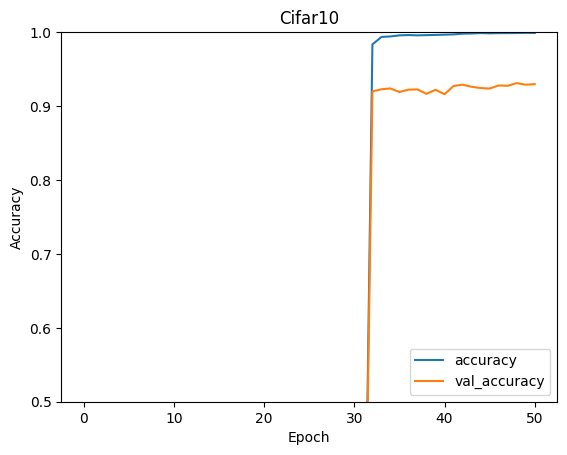

In [ ]:

hist = [history,history2,history3]
acc_list = [acc for i in hist for acc in i.history['accuracy']]
val_acc_list = [acc for i in hist for acc in i.history['val_accuracy']]

print(acc_list)

plt.plot(acc_list, label='accuracy')
plt.plot(val_acc_list, label = 'val_accuracy')
plt.title('Cifar10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# print(test_loss)
print(test_acc)

In [ ]:
model.save('drive/MyDrive/00AI/final2_cifar10_model')

# best : epochs = 8 in 3th stage, batch = 64
# loss: 0.0046 - accuracy: 0.9988 - val_loss: 0.4255 - val_accuracy: 0.9310

# original : epochs = 10, batch = 64
#  loss: 0.5924 - accuracy: 0.7902
#- val_loss: 0.8711 - val_accuracy: 0.7118
